In [ ]:
import pandas as pd

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, r2_score

from sklearn.metrics import confusion_matrix




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/wild data analyst/Hackathon/df_14_22.csv', index_col=0)

In [ ]:
df

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2014-996625,67000.0,30.0,2233,1.0,appartement,pinay-sur-Seine,Iris 4,93031,93,930310104,93031000AI0138,2.320901,48.951260,2014-01-02
1,2014-833749,166000.0,55.0,3018,3.0,appartement,Triel-sur-Seine,Sud,78624,78,786240103,78624000AX0815,2.006452,48.976800,2014-01-02
2,2014-1059823,401398.0,43.0,9334,3.0,appartement,Paris 10e Arrondissement,Porte Saint-Denis 4,75110,75,751103804,75110000AU0062,2.352617,48.873116,2014-01-02
3,2014-1081415,140000.0,20.0,7000,1.0,appartement,Paris 18e Arrondissement,Grandes Carrieres 5,75118,75,751186905,75118000AM0019,2.326738,48.888350,2014-01-02
4,2014-815375,297000.0,79.0,3759,4.0,maison,Chelles,Nord-Ouest,77108,77,771080301,77108000AN0411,2.618308,48.887978,2014-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916738,2022-537268,1905000.0,160.0,11906,6.0,Appartement,Paris 15e Arrondissement,Javel 7,75115,75,751156007,75115000CW0050,2.310843,48.845591,2022-04-14
916739,2022-537269,270000.0,51.0,5294,0.0,Local industriel. commercial ou assimilé,Paris 11e Arrondissement,Folie Mericourt 2,75111,75,751114102,75111000CN0034,2.397491,48.850253,2022-06-10
916740,2022-537270,1326666.6,281.0,4721,0.0,Local industriel. commercial ou assimilé,Paris 14e Arrondissement,Montparnasse 11,75114,75,751145311,75114000CQ0137,2.318175,48.832970,2022-06-16
916741,2022-537271,423000.0,43.0,9837,2.0,Appartement,Paris 15e Arrondissement,Javel 7,75115,75,751156007,75115000AC0055,2.305379,48.837454,2022-06-21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916743 entries, 0 to 916742
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_mutation                916743 non-null  object 
 1   valeur_fonciere            916743 non-null  float64
 2   surface_reelle_bati        916743 non-null  float64
 3   prix_m2                    916743 non-null  int64  
 4   nombre_pieces_principales  916743 non-null  float64
 5   type_local                 916743 non-null  object 
 6   nom_commune                916743 non-null  object 
 7   nom_iris                   916743 non-null  object 
 8   code_commune               916743 non-null  int64  
 9   code_departement           916743 non-null  int64  
 10  code_iris                  916743 non-null  int64  
 11  id_parcelles               916743 non-null  object 
 12  longitude                  916743 non-null  float64
 13  latitude                   91

In [ ]:
df['valeur_fonciere']=df['valeur_fonciere'].astype(int)

In [ ]:
df['surface_reelle_bati']=df['surface_reelle_bati'].astype(int)


In [ ]:
df['nombre_pieces_principales']=df['nombre_pieces_principales'].astype(int)

In [ ]:
df.describe()

,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,code_commune,code_departement,code_iris,longitude,latitude
count,9.167430e+05,916743.000000,9.167430e+05,916743.000000,916743.000000,916743.000000,9.167430e+05,916743.000000,916743.000000
mean,4.234266e+05,77.834608,6.742444e+03,2.987040,85081.017304,84.904356,8.508116e+08,2.348763,48.839434
std,1.895872e+06,282.147705,6.033094e+04,1.658861,8485.605670,8.505910,8.485498e+07,0.207996,0.125951
min,0.000000e+00,1.000000,0.000000e+00,0.000000,75101.000000,75.000000,7.510101e+08,1.453111,48.125442
25%,1.880000e+05,39.000000,3.208000e+03,2.000000,75119.000000,75.000000,7.511976e+08,2.261293,48.804348
50%,2.800000e+05,61.000000,4.795000e+03,3.000000,91201.000000,91.000000,9.120101e+08,2.340197,48.857930
75%,4.290000e+05,88.000000,8.026000e+03,4.000000,93048.000000,93.000000,9.304804e+08,2.434724,48.898678
max,4.352450e+08,66678.000000,3.294000e+07,112.000000,95690.000000,95.000000,9.569000e+08,3.518413,49.236552


In [ ]:
df['prix_m2'].sort_values(ascending=False).head(1000)

728995    32940000
617372    23300000
565995    15643674
722460    14976379
621222    14666667
            ...   
547724      134351
649070      134211
792781      134211
620058      134182
802027      134144
Name: prix_m2, Length: 1000, dtype: int64

In [ ]:
df['date_mutation']=pd.to_datetime(df['date_mutation'])

In [ ]:
df.groupby('code_commune')['prix_m2'].mean().sort_values(ascending=False).round().head(20)

code_commune
95008    48944.0
75108    22930.0
92062    21352.0
75106    19350.0
75107    17027.0
75101    16756.0
78030    15331.0
75102    14720.0
91022    13828.0
92044    13302.0
75116    13016.0
75104    12894.0
75109    12619.0
75103    12014.0
92051    11993.0
75105    11989.0
93055    11847.0
75110    11146.0
75117    10764.0
75114    10595.0
Name: prix_m2, dtype: float64

In [ ]:
# df.loc[df['code_commune'] == 95008]  #trouvé une anomalie de la commune 95008


In [ ]:
# df[df['id_mutation'].str.contains('2020-1393893')]  #un château

In [ ]:
#df=df[df['id_mutation']!="2020-1393893"] #Supprimé l'anomalie

In [ ]:
df.groupby('code_departement')['prix_m2'].mean().sort_values(ascending=False).round()

code_departement
75    11316.0
92     8236.0
94     5659.0
93     4773.0
78     4599.0
95     3818.0
91     3630.0
77     3376.0
Name: prix_m2, dtype: float64

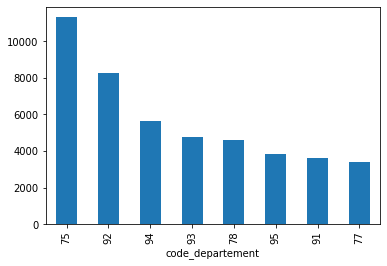

In [ ]:
(df.groupby('code_departement')['prix_m2'].mean().sort_values(ascending=False).round()).plot(kind="bar")

In [ ]:
df.groupby('code_commune')['prix_m2'].mean().sort_values(ascending=False).round().head(20)

code_commune
95008    48944.0
75108    22930.0
92062    21352.0
75106    19350.0
75107    17027.0
75101    16756.0
78030    15331.0
75102    14720.0
91022    13828.0
92044    13302.0
75116    13016.0
75104    12894.0
75109    12619.0
75103    12014.0
92051    11993.0
75105    11989.0
93055    11847.0
75110    11146.0
75117    10764.0
75114    10595.0
Name: prix_m2, dtype: float64

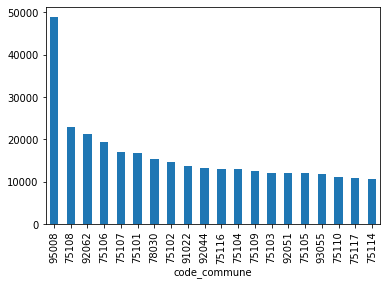

In [ ]:
(df.groupby('code_commune')['prix_m2'].mean().sort_values(ascending=False).round().head(20)).plot(kind="bar")

In [ ]:
df=df[np.abs(df['prix_m2']-df['prix_m2'].mean())<=(3*df['prix_m2'].std())]

In [ ]:
df=df[np.abs(df['valeur_fonciere']-df['valeur_fonciere'].mean())<=(3*df['valeur_fonciere'].std())]


In [ ]:
df=df[np.abs(df['nombre_pieces_principales']-df['nombre_pieces_principales'].mean())<=(3*df['nombre_pieces_principales'].std())]

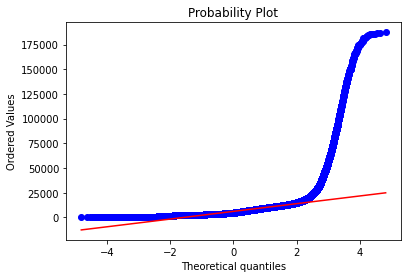

In [ ]:
from scipy import stats
res = stats.probplot(df['prix_m2'], plot=plt)

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='PuBu')

NameError: ignored

In [ ]:
df.corr()

,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,code_commune,code_departement,code_iris,longitude,latitude
valeur_fonciere,1.000000,0.216152,0.463398,0.263533,-0.161227,-0.159102,-0.161236,-0.089195,0.049599
surface_reelle_bati,0.216152,1.000000,-0.078932,0.112094,0.021346,0.020116,0.021344,0.000456,-0.029983
prix_m2,0.463398,-0.078932,1.000000,-0.229564,-0.264979,-0.260217,-0.264979,-0.068677,0.095346
nombre_pieces_principales,0.263533,0.112094,-0.229564,1.000000,0.140419,0.135665,0.140408,-0.004069,-0.084758
code_commune,-0.161227,0.021346,-0.264979,0.140419,1.000000,0.999780,0.999908,-0.035917,0.070343
code_departement,-0.159102,0.020116,-0.260217,0.135665,0.999780,1.000000,0.999688,-0.032459,0.072573
code_iris,-0.161236,0.021344,-0.264979,0.140408,0.999908,0.999688,1.000000,-0.035929,0.070340
longitude,-0.089195,0.000456,-0.068677,-0.004069,-0.035917,-0.032459,-0.035929,1.000000,-0.253912
latitude,0.049599,-0.029983,0.095346,-0.084758,0.070343,0.072573,0.070340,-0.253912,1.000000


In [ ]:
df._get_numeric_data()

,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,code_commune,code_departement,code_iris,longitude,latitude
0,67000,30,2233,1,93031,93,930310104,2.320901,48.951260
1,166000,55,3018,3,78624,78,786240103,2.006452,48.976800
2,401398,43,9334,3,75110,75,751103804,2.352617,48.873116
3,140000,20,7000,1,75118,75,751186905,2.326738,48.888350
4,297000,79,3759,4,77108,77,771080301,2.618308,48.887978
...,...,...,...,...,...,...,...,...,...
916738,1905000,160,11906,6,75115,75,751156007,2.310843,48.845591
916739,270000,51,5294,0,75111,75,751114102,2.397491,48.850253
916740,1326666,281,4721,0,75114,75,751145311,2.318175,48.832970
916741,423000,43,9837,2,75115,75,751156007,2.305379,48.837454


In [ ]:
y =df['prix_m2']   
X =df[['valeur_fonciere','surface_reelle_bati','nombre_pieces_principales','code_commune','code_departement']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 55, train_size = 0.75)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 913882
The length of the train dataset is   : 685411
The length of the test dataset is    : 228471


In [ ]:
modelKNNR = KNeighborsRegressor()
modelKNNR.fit(X_train, y_train)
modelKNNR.score(X_train, y_train), modelKNNR.score(X_test, y_test)

(0.713628451086768, 0.5430353762812914)

In [ ]:
df['predict_prix_m2']=modelKNNR.predict(df[['valeur_fonciere','surface_reelle_bati','nombre_pieces_principales','code_commune','code_departement']])

In [ ]:
df

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation,predict_prix_m2
0,2014-996625,67000,30,2233,1,appartement,pinay-sur-Seine,Iris 4,93031,93,930310104,93031000AI0138,2.320901,48.951260,2014-01-02,2484.8
1,2014-833749,166000,55,3018,3,appartement,Triel-sur-Seine,Sud,78624,78,786240103,78624000AX0815,2.006452,48.976800,2014-01-02,2899.2
2,2014-1059823,401398,43,9334,3,appartement,Paris 10e Arrondissement,Porte Saint-Denis 4,75110,75,751103804,75110000AU0062,2.352617,48.873116,2014-01-02,10206.2
3,2014-1081415,140000,20,7000,1,appartement,Paris 18e Arrondissement,Grandes Carrieres 5,75118,75,751186905,75118000AM0019,2.326738,48.888350,2014-01-02,7000.0
4,2014-815375,297000,79,3759,4,maison,Chelles,Nord-Ouest,77108,77,771080301,77108000AN0411,2.618308,48.887978,2014-01-02,3891.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916738,2022-537268,1905000,160,11906,6,Appartement,Paris 15e Arrondissement,Javel 7,75115,75,751156007,75115000CW0050,2.310843,48.845591,2022-04-14,12794.8
916739,2022-537269,270000,51,5294,0,Local industriel. commercial ou assimilé,Paris 11e Arrondissement,Folie Mericourt 2,75111,75,751114102,75111000CN0034,2.397491,48.850253,2022-06-10,5357.6
916740,2022-537270,1326666,281,4721,0,Local industriel. commercial ou assimilé,Paris 14e Arrondissement,Montparnasse 11,75114,75,751145311,75114000CQ0137,2.318175,48.832970,2022-06-16,9492.8
916741,2022-537271,423000,43,9837,2,Appartement,Paris 15e Arrondissement,Javel 7,75115,75,751156007,75115000AC0055,2.305379,48.837454,2022-06-21,9724.0


In [ ]:
df.to_csv('df.csv')

In [ ]:
df['predict_prix_m2'].isna().sum()

0

In [ ]:
# linear_model = LinearRegression()
# linear_model.fit(X_train, y_train)
# linear_model.score(X_train, y_train), linear_model.score(X_test, y_test)    (0.4022420796407543, 0.3959202561352121)
